In [4]:
library(phyloseq)
library(ggplot2)
library(vegan)
library(readr)
library(data.table)
library(dplyr)
library(tidyr)
library(stats)
library(ggpubr)
library(dunn.test)
library(rsample)
library(broom)
library(purrr)

In [3]:
#read in updated ps file with weight, diet
batrun_nt = readRDS("~/batrun_wt_nt.rds")

In [4]:
gut = subset_samples(batrun_nt, SampleType=="FecalFTA")
oral = subset_samples(batrun_nt, SampleType=="TongueEtOH")
skin = subset_samples(batrun_nt, SampleType=="SkinEtOH")

### Estimate Shannon diversity by sample type and a) Host genus, b) Host species

#### Data filtered to libraries with >1k reads

In [20]:
sample_tab = data.frame(sample_data(batrun_nt))

In [51]:
#(a) Host Genus
sha = estimate_richness(batrun_nt, split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)

dfsha = merge(sha, sample_tab, on="SampleID")

stats = dfsha %>%
    group_by(Host_Genus, SampleType) %>%
    summarize(median = median(Shannon), 
              mean = mean(Shannon),
              sd = sd(Shannon),
              sem = sd(Shannon/sqrt(length(Shannon)))) %>%
    arrange(-desc(mean))
stats


Host_Genus,SampleType,median,mean,sd,sem
Otomops,TongueEtOH,0.2152838,0.3519630,0.3295758,0.06463514
Coleura,TongueEtOH,0.2817501,0.3779059,0.1873870,0.05649932
Scotophilus,TongueEtOH,0.3790899,0.3790899,NA,NA
Otomops,FecalFTA,0.6171035,0.9012620,0.9160379,0.17964981
Pipistrellus,FecalFTA,1.0503263,1.0503263,NA,NA
Chaerephon,FecalFTA,1.2631497,1.1661033,0.7054716,0.20365210
Hipposideros,TongueEtOH,0.9790989,1.2550772,0.9469406,0.13259821
Scotophilus,FecalFTA,0.9393782,1.2700170,0.6748913,0.38964869
Triaenops,TongueEtOH,1.3091956,1.2853809,0.3441483,0.11471610
Myotis,TongueEtOH,1.3695704,1.3287536,0.3965558,0.16189321


In [52]:
#(b) Host species
sha = estimate_richness(batrun_nt, split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)

dfsha = merge(sha, sample_tab, on="SampleID")

stats = dfsha %>%
    group_by(Host_taxon, SampleType) %>%
    summarize(median = median(Shannon), 
              mean = mean(Shannon),
              sd = sd(Shannon),
              sem = sd(Shannon/sqrt(length(Shannon)))) %>%
    arrange(-desc(mean))
stats

Host_taxon,SampleType,median,mean,sd,sem
Otomops_harrisoni,TongueEtOH,0.2152838,0.3519630,0.3295758,0.06463514
Coleura_afra,TongueEtOH,0.2817501,0.3779059,0.1873870,0.05649932
Scotophilus_dinganii,TongueEtOH,0.3790899,0.3790899,NA,NA
Hipposideros_caffer,TongueEtOH,0.8974529,0.8193207,0.4500419,0.07398644
Epomophorus_wahlbergi,TongueEtOH,0.8266366,0.8193258,0.2310952,0.11554762
Rhinolophus_clivosus,FecalFTA,0.8880479,0.8880479,NA,NA
Otomops_harrisoni,FecalFTA,0.6171035,0.9012620,0.9160379,0.17964981
Miniopterus_africanus,TongueEtOH,0.7296464,1.0059034,0.6221582,0.13911881
Nycteris_thebaica,FecalFTA,1.0503379,1.0136309,0.4739698,0.27364657
Pipistrellus_sp.,FecalFTA,1.0503263,1.0503263,NA,NA


### Estimate Observed ASV richness by sample type and a) Host genus, b) Host species

In [56]:
#(a) Host genus

obs = estimate_richness(batrun_nt, split = TRUE, measures = "Observed")
obs$SampleID = rownames(obs)

dfobs = merge(obs, sample_tab, on="SampleID")

stats = dfobs %>%
    group_by(SampleType, Host_Genus) %>%
    summarize(median = median(Observed), 
              mean = mean(Observed),
              sd = sd(Observed),
              sem = sd(Observed/sqrt(length(Observed)))) %>%
    arrange(-desc(mean))
stats

SampleType,Host_Genus,median,mean,sd,sem
TongueEtOH,Scotophilus,17.0,17.00000,NA,NA
TongueEtOH,Otomops,22.0,22.53846,9.638385,1.890243
TongueEtOH,Scotoecus,25.0,24.33333,4.041452,2.333333
TongueEtOH,Neoromicia,28.0,38.75000,27.293162,13.646581
FecalFTA,Micropteropus,38.0,39.00000,3.605551,2.081666
TongueEtOH,Micropteropus,35.5,39.50000,12.013881,6.006940
TongueEtOH,Coleura,40.0,41.63636,14.129917,4.260330
TongueEtOH,Epomophorus,35.0,43.33333,18.172782,6.057594
FecalFTA,Coleura,48.0,49.66667,13.453624,4.484541
TongueEtOH,Miniopterus,35.5,49.84286,47.009292,5.618685


In [57]:
#(b) Host species

obs = estimate_richness(batrun_nt, split = TRUE, measures = "Observed")
obs$SampleID = rownames(obs)

dfobs = merge(obs, sample_tab, on="SampleID")

stats = dfobs %>%
    group_by(SampleType, Host_taxon) %>%
    summarize(median = median(Observed), 
              mean = mean(Observed),
              sd = sd(Observed),
              sem = sd(Observed/sqrt(length(Observed)))) %>%
    arrange(-desc(mean))
stats

SampleType,Host_taxon,median,mean,sd,sem
TongueEtOH,Scotophilus_dinganii,17.0,17.00000,NA,NA
TongueEtOH,Otomops_harrisoni,22.0,22.53846,9.638385,1.890243
TongueEtOH,Scotoecus_hindei,25.0,24.33333,4.041452,2.333333
TongueEtOH,Neoromicia_sp.,24.0,25.33333,6.110101,3.527668
FecalFTA,Rhinolophus_clivosus,26.0,26.00000,NA,NA
TongueEtOH,Miniopterus_africanus,28.5,29.45000,17.551353,3.924602
TongueEtOH,Rhinolophus_clivosus,31.0,31.00000,NA,NA
TongueEtOH,Epomophorus_labiatus,35.0,35.80000,4.764452,2.130728
TongueEtOH,Miniopterus_inflatus rufus,37.0,37.50000,8.544004,4.272002
FecalFTA,Micropteropus_pusillus,38.0,39.00000,3.605551,2.081666


geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


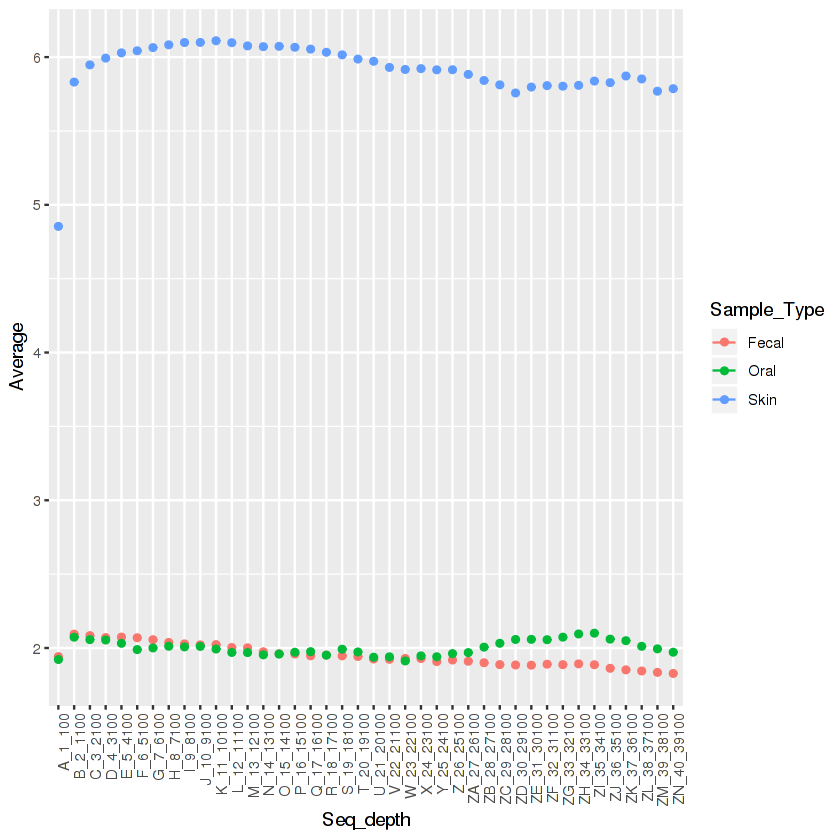

In [7]:
shannon$Seq_depth = as.factor(shannon$Seq_depth)

p = ggplot(shannon, aes(x=Seq_depth, y=Average, color = Sample_Type)) +
    geom_line() +
    geom_point()

p = p + theme(axis.text.x = element_text(angle = 90, hjust = 1))
          
p

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


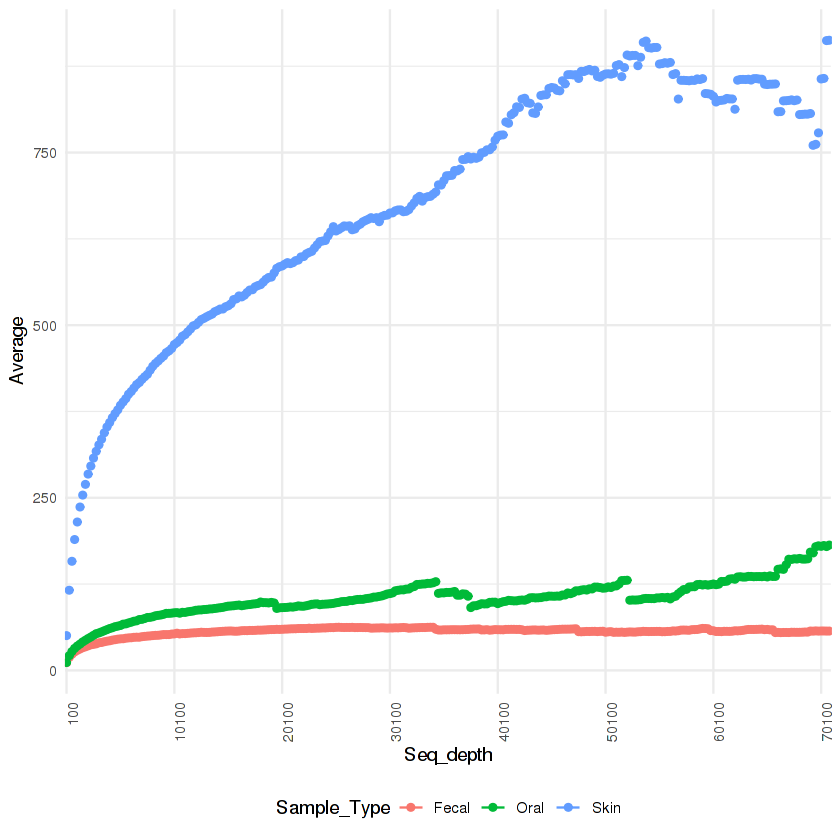

In [31]:
observed$Seq_depth = as.factor(observed$Seq_depth)

p = ggplot(observed, aes(x=Seq_depth, y=Average, color = Sample_Type)) + 
    geom_line() +
    geom_point() 

p = p + scale_x_discrete(breaks=seq(100,70850,by=10000))

#p = p + scale_x_discrete(limits=c("0","1000","5000","10000","15000","20000","25000","30000","35000","40000","45000","50000","55000","60000","65000","70000")) 

p = p + theme_minimal()

p = p + theme(axis.text.x = element_text(angle = 90, hjust = 1),
             legend.position="bottom")
          
p

In [29]:
png('rarefaction_curves.png', width=8, height=6, units='in', res=300)
plot(p)
dev.off()

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


png 
  2

In [17]:
#Shannon Div of 10k rarefied data

sha = estimate_richness(batrun_nt_10k, split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)

dfsha = merge(sha, sample_tab, on="SampleID")

ordsha = sha %>% group_by("SampleType") %>%
    summarize(med.sha = median(Shannon)) %>%
    arrange(desc(med.sha)) %>%
    magrittr::extract2("SampleType")

stats = dfsha %>%
    group_by(SampleType) %>%
    summarize(median = median(Shannon), 
              mean = mean(Shannon),
              sd = sd(Shannon),
              sem = sd(Shannon/sqrt(length(Shannon)))) %>%
    arrange(-desc(SampleType))
stats

SampleType,median,mean,sd,sem
FecalFTA,1.318866,1.402596,0.7957791,0.04114876
SkinEtOH,4.413888,4.249096,0.9470075,0.04648677
TongueEtOH,1.382893,1.381076,0.9171467,0.05385671


### RAREFIED TO 10K SEQ DEPTH

In [26]:
batrun_nt_rare10k = rarefy_even_depth(batrun_nt, sample.size = 10000, 
    rngseed = FALSE, replace = TRUE, trimOTUs = TRUE, verbose = TRUE)

You set `rngseed` to FALSE. Make sure you've set & recorded
 the random seed of your session for reproducibility.
See `?set.seed`

...
157 samples removedbecause they contained fewer reads than `sample.size`.
Up to first five removed samples are: 

PWW.3523.FecalFTAPWW.3527.FecalFTAPWW.3500.FecalFTAPWW.3557.FecalFTAPWW.3467.FecalFTA	
...
7753OTUs were removed because they are no longer 
present in any sample after random subsampling

...


##### Compare number of libraries between rarefied / non-rarefied

In [6]:
# Non-rarefied = 1236 libraries
batrun_nt

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 37643 taxa and 1236 samples ]
sample_data() Sample Data:       [ 1236 samples by 47 sample variables ]
tax_table()   Taxonomy Table:    [ 37643 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 37643 tips and 37641 internal nodes ]

In [27]:
# Rarefied = 1079 libraries
batrun_nt_rare10k

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 29890 taxa and 1079 samples ]
sample_data() Sample Data:       [ 1079 samples by 47 sample variables ]
tax_table()   Taxonomy Table:    [ 29890 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 29890 tips and 29888 internal nodes ]

#### Shannon Div for 10k rarefied

In [9]:
sample_tab = read.csv("~/FullMetaData_Bat_All.csv")
batrun_nt_rare10k = readRDS("~/batrun_nt_rare10k.rds")

In [37]:
sha = estimate_richness(batrun_nt_rare10k, split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)

dfsha = merge(sha, sample_tab, on="SampleID")

ordsha = sha %>% group_by("SampleType") %>%
    summarize(med.sha = median(Shannon)) %>%
    arrange(desc(med.sha)) %>%
    magrittr::extract2("SampleType")

stats = dfsha %>%
    group_by(SampleType) %>%
    summarize(median = median(Shannon), 
              mean = mean(Shannon),
              sd = sd(Shannon),
              sem = sd(Shannon/sqrt(length(Shannon)))) %>%
    arrange(-desc(SampleType))
stats

SampleType,median,mean,sd,sem
FecalFTA,1.318606,1.400122,0.7949925,0.04110808
SkinEtOH,4.410955,4.239202,0.9438237,0.04633048
TongueEtOH,1.382569,1.378599,0.9138046,0.05366045


In [30]:
stats.krusk = kruskal.test(Shannon~SampleType, data=dfsha)
stats.krusk


	Kruskal-Wallis rank sum test

data:  Shannon by SampleType
Kruskal-Wallis chi-squared = 678.09, df = 2, p-value < 2.2e-16


In [31]:
dunn = dunn.test(dfsha$Shannon, g=dfsha$SampleType, method="bonferroni")
dunn

  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 678.0885, df = 2, p-value = 0


                           Comparison of x by group                            
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |   FecalFTA   SkinEtOH
---------+----------------------
SkinEtOH |  -22.70677
         |    0.0000*
         |
TongueEt |   0.304458   21.46379
         |     1.0000    0.0000*

alpha = 0.05
Reject Ho if p <= alpha/2


$chi2
[1] 678.0885

$Z
[1] -22.7067744   0.3044585  21.4637904

$P
[1] 1.920082e-114  3.803893e-01 1.697344e-102

$P.adjusted
[1] 5.760245e-114  1.000000e+00 5.092033e-102

$comparisons
[1] "FecalFTA - SkinEtOH"   "FecalFTA - TongueEtOH" "SkinEtOH - TongueEtOH"

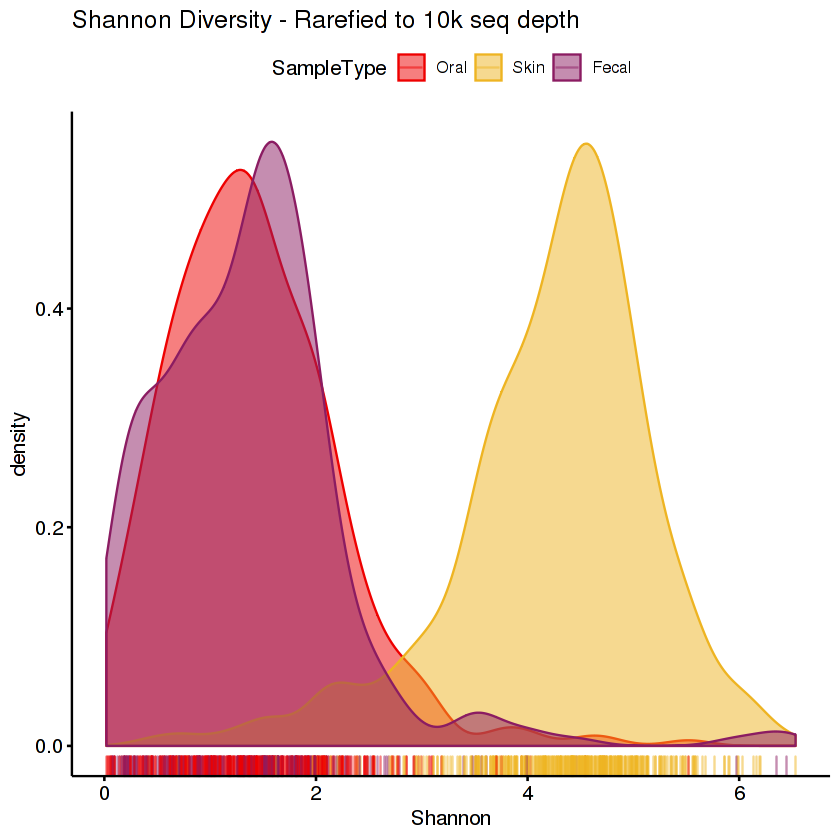

In [38]:
dfsha$SampleType <- factor(
     dfsha$SampleType, 
     labels=c('Oral','Skin','Fecal'))

dfsha_density = ggdensity(dfsha, x = "Shannon", color = "SampleType", fill= "SampleType", rug=TRUE) +
    ggtitle("Shannon Diversity - Rarefied to 10k seq depth") 

dfsha_density = dfsha_density + scale_fill_manual(values = c(
"red2",
"goldenrod2",
"maroon4"))

dfsha_density = dfsha_density + scale_color_manual(values = c(
"red2",
"goldenrod2",
"maroon4"))

dfsha_density

#### Observed richness for 10k rarefied

In [7]:
sample_tab = read.csv("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Metadata_files/FullMetaData_Bat_All.csv")

In [40]:
obs = estimate_richness(batrun_nt_rare10k, split = TRUE, measures = "Observed")
obs$SampleID = rownames(obs)

dfobs = merge(obs, sample_tab, on="SampleID")

ordobs = obs %>% group_by("SampleType") %>%
    summarize(med.obs = median(Observed)) %>%
    arrange(desc(med.obs)) %>%
    magrittr::extract2("SampleType")

In [34]:
stats = dfobs %>%
    group_by(SampleType) %>%
    summarize(median = median(Observed), 
              mean = mean(Observed),
              sd = sd(Observed),
              sem = sd(Observed/sqrt(length(Observed)))) %>%
    arrange(-desc(mean))
stats

SampleType,median,mean,sd,sem
FecalFTA,35,51.35294,58.71117,3.035882
TongueEtOH,38,79.00000,181.00800,10.629156
SkinEtOH,373,455.00241,267.98119,13.154679


In [ ]:
x$name <- factor(x$name, levels = x$name[order(x$val)])

In [41]:
avg_obs <- aggregate(Observed ~ SampleType, data = dfobs, mean)

In [42]:
dfobs$SampleType <-factor(dfobs$SampleType, levels=avg_obs[order(avg_obs$Observed), "SampleType"])

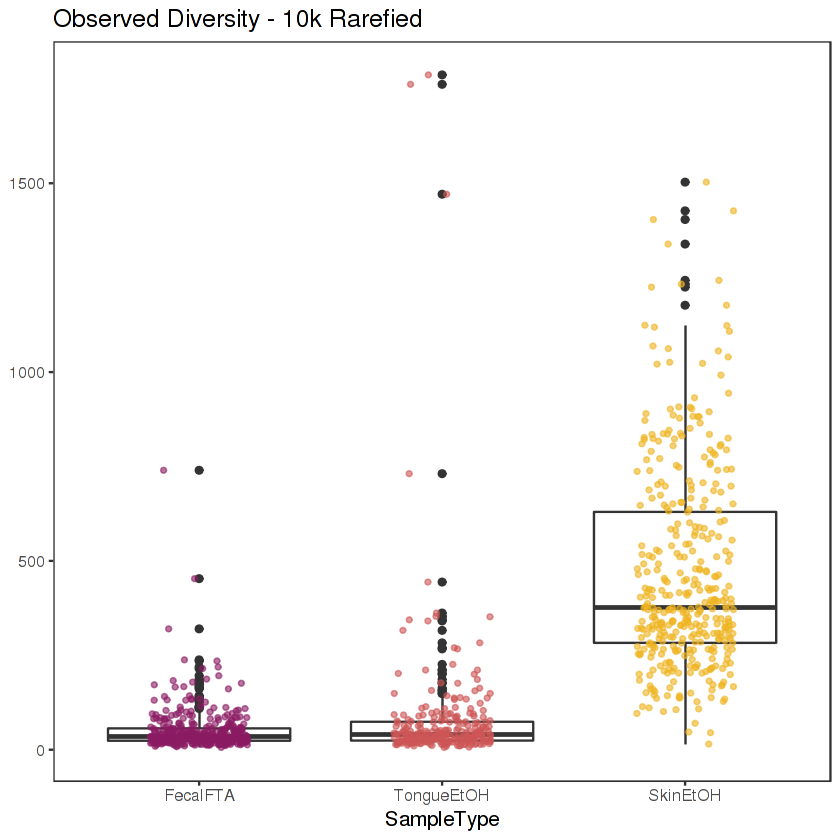

In [44]:
# BOX PLOT

p = ggplot(na.omit(dfobs), aes(x = SampleType, y = Observed)) + ggtitle("Observed Diversity - 10k Rarefied")

p = p + geom_boxplot() + ylab("# of Observed OTUs")

p = p + geom_point(size = 1, alpha = 0.6, aes(color = SampleType),  
                   position = position_jitter(h = 0, w = 0.2))

p = p + scale_color_manual(values=c(
"maroon4",
"indianred3",
"goldenrod2"))


p = p + theme_bw() + theme(text=element_text(size=12, color="black",family="Arial"),
                           legend.key = element_blank(),
                           legend.position = "none",
                           axis.title.y=element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank())
p

In [38]:
stats.krusk = kruskal.test(Observed~SampleType, data=dfobs)
stats.krusk


	Kruskal-Wallis rank sum test

data:  Observed by SampleType
Kruskal-Wallis chi-squared = 677.01, df = 2, p-value < 2.2e-16


In [40]:
dunn = dunn.test(dfobs$Observed, g=dfobs$SampleType, method="bonferroni")
dunn

  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 677.012, df = 2, p-value = 0


                           Comparison of x by group                            
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |   FecalFTA   SkinEtOH
---------+----------------------
SkinEtOH |  -23.50409
         |    0.0000*
         |
TongueEt |  -1.469763   20.39275
         |     0.2124    0.0000*

alpha = 0.05
Reject Ho if p <= alpha/2


$chi2
[1] 677.012

$Z
[1] -23.504097  -1.469763  20.392754

$P
[1] 1.851838e-122  7.081293e-02  9.695918e-93

$P.adjusted
[1] 5.555513e-122  2.124388e-01  2.908775e-92

$comparisons
[1] "FecalFTA - SkinEtOH"   "FecalFTA - TongueEtOH" "SkinEtOH - TongueEtOH"

### OTHER TESTS (FILTERING TO X READ DEPTH)

### Sequencing depth > 1k reads  *  USED FOR FINAL PUBLICATION

In [8]:
batrun_nt = readRDS("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/batrun_wt_nt.rds")
batrun = readRDS("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/batrun_wt.rds")
sample_tab = data.frame(sample_data(batrun_nt))

##### Observed Richness

In [9]:
obs = estimate_richness(batrun_nt, split = TRUE, measures = "Observed")
obs$SampleID = rownames(obs)

dfobs = merge(obs, sample_tab, on="SampleID")

ordobs = obs %>% group_by("SampleType") %>%
    summarize(med.obs = median(Observed)) %>%
    arrange(desc(med.obs)) %>%
    magrittr::extract2("SampleType")

stats = dfobs %>%
    group_by(SampleType) %>%
    summarize(median = median(Observed), 
              mean = mean(Observed),
              sd = sd(Observed),
              sem = sd(Observed/sqrt(length(Observed)))) %>%
    arrange(-desc(SampleType))
stats

SampleType,median,mean,sd,sem
FecalFTA,50.5,72.68478,75.17300,3.918663
SkinEtOH,450.5,583.79250,408.98870,20.449435
TongueEtOH,47.0,77.35277,91.37898,4.934001


In [11]:
obs = estimate_richness(batrun_nt, split = TRUE, measures = "Observed")
obs$SampleID = rownames(obs)

dfobs = merge(obs, sample_tab, on="SampleID")

ordobs = obs %>% group_by("Host_Genus") %>%
    summarize(med.obs = median(Observed)) %>%
    arrange(desc(med.obs)) %>%
    magrittr::extract2("Host_Genus")

stats = dfobs %>%
    group_by(Host_Genus, SampleType) %>%
    summarize(median = median(Observed), 
              mean = mean(Observed),
              sd = sd(Observed),
              sem = sd(Observed/sqrt(length(Observed)))) %>%
    arrange(-desc(Host_Genus))
stats

Host_Genus,SampleType,median,mean,sd,sem
Chaerephon,FecalFTA,38.0,53.08333,40.112248,11.579409
Chaerephon,SkinEtOH,621.5,581.35714,183.267189,48.980217
Chaerephon,TongueEtOH,49.5,57.92857,24.966021,6.672450
Coleura,FecalFTA,48.0,49.66667,13.453624,4.484541
Coleura,SkinEtOH,586.0,592.09091,58.556732,17.655519
Coleura,TongueEtOH,40.0,41.63636,14.129917,4.260330
Epomophorus,FecalFTA,48.0,54.11111,13.806198,4.602066
Epomophorus,SkinEtOH,422.0,602.07692,607.460350,168.479188
Epomophorus,TongueEtOH,35.0,43.33333,18.172782,6.057594
Hipposideros,FecalFTA,49.0,76.21538,63.652988,7.895181


In [8]:
stats.krusk = kruskal.test(Observed~SampleType, data=dfobs)
stats.krusk


	Kruskal-Wallis rank sum test

data:  Observed by SampleType
Kruskal-Wallis chi-squared = 711.23, df = 2, p-value < 2.2e-16


In [9]:
dunn = dunn.test(dfobs$Observed, g=dfobs$SampleType, method="bonferroni")
dunn

  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 711.2307, df = 2, p-value = 0


                           Comparison of x by group                            
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |   FecalFTA   SkinEtOH
---------+----------------------
SkinEtOH |  -22.94547
         |    0.0000*
         |
TongueEt |   0.071894   22.60842
         |     1.0000    0.0000*

alpha = 0.05
Reject Ho if p <= alpha/2


$chi2
[1] 711.2307

$Z
[1] -22.94547687   0.07189476  22.60842384

$P
[1] 8.174762e-117  4.713428e-01 1.790497e-113

$P.adjusted
[1] 2.452429e-116  1.000000e+00 5.371491e-113

$comparisons
[1] "FecalFTA - SkinEtOH"   "FecalFTA - TongueEtOH" "SkinEtOH - TongueEtOH"

##### Shannon Diversity

In [76]:
sha = estimate_richness(batrun_wt_nt, split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)

dfsha = merge(sha, sample_tab, on="SampleID")

ordsha = sha %>% group_by("SampleType") %>%
    summarize(med.sha = median(Shannon)) %>%
    arrange(desc(med.sha)) %>%
    magrittr::extract2("SampleType")

stats = dfsha %>%
    group_by(SampleType) %>%
    summarize(median = median(Shannon), 
              mean = mean(Shannon),
              sd = sd(Shannon),
              sem = sd(Shannon/sqrt(length(Shannon)))) %>%
    arrange(-desc(SampleType))
stats

SampleType,median,mean,sd,sem
FecalFTA,50.5,72.68478,75.17300,3.918663
SkinEtOH,450.5,583.79250,408.98870,20.449435
TongueEtOH,47.0,77.35277,91.37898,4.934001


In [13]:
obs = estimate_richness(batrun_nt, split = TRUE, measures = "Shannon")
obs$SampleID = rownames(obs)

dfobs = merge(obs, sample_tab, on="SampleID")

ordobs = obs %>% group_by("Host_Genus") %>%
    summarize(med.obs = median(Shannon)) %>%
    arrange(desc(med.obs)) %>%
    magrittr::extract2("Host_Genus")

stats = dfobs %>%
    group_by(Host_Genus, SampleType) %>%
    summarize(median = median(Shannon), 
              mean = mean(Shannon),
              sd = sd(Shannon),
              sem = sd(Shannon/sqrt(length(Shannon)))) %>%
    arrange(-desc(Host_Genus))
stats

Host_Genus,SampleType,median,mean,sd,sem
Chaerephon,FecalFTA,1.2631497,1.1661033,0.7054716,0.20365210
Chaerephon,SkinEtOH,3.7144232,3.6121288,0.6305851,0.16853096
Chaerephon,TongueEtOH,1.4688842,1.3960709,0.5189773,0.13870252
Coleura,FecalFTA,1.6798738,1.5460134,0.4066792,0.13555974
Coleura,SkinEtOH,4.0034618,4.0655418,0.3514328,0.10596096
Coleura,TongueEtOH,0.2817501,0.3779059,0.1873870,0.05649932
Epomophorus,FecalFTA,1.8693082,1.6552158,0.4178439,0.13928129
Epomophorus,SkinEtOH,4.4530535,3.8341569,1.7279259,0.47924041
Epomophorus,TongueEtOH,1.6901491,1.4411964,0.6203609,0.20678695
Hipposideros,FecalFTA,1.4119717,1.4826439,0.7681808,0.09528111


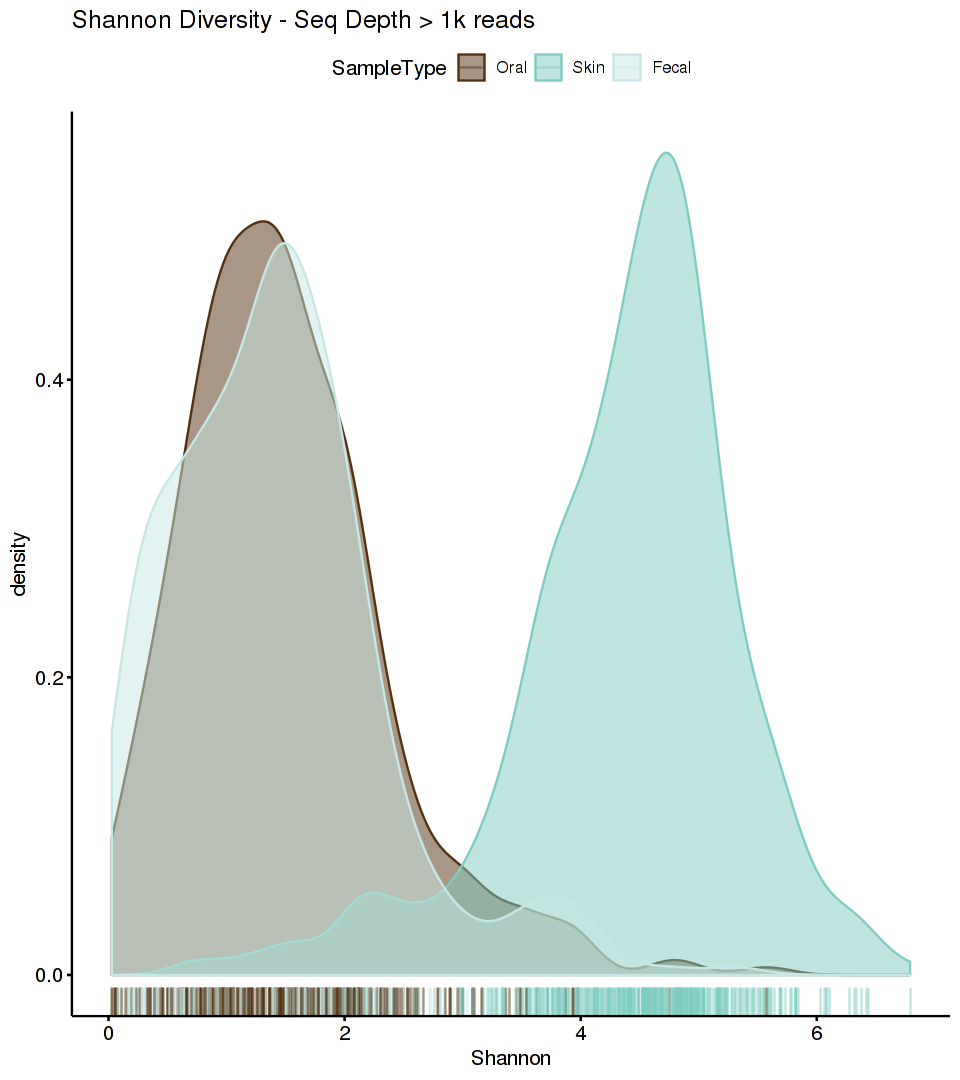

In [75]:
dfsha$SampleType <- factor(
     dfsha$SampleType)#, 
     #labels=c('Oral','Skin','Fecal'))

dfsha_density = ggdensity(dfsha, x = "Shannon", color= "SampleType", fill= "SampleType", rug=TRUE) +
    ggtitle("Shannon Diversity - Seq Depth > 1k reads") 


#dfsha_density = dfsha_density + scale_fill_brewer(palette = "BrBG")

#dfsha_density = dfsha_density + scale_color_brewer(palette = "BrBG")

dfsha_density = dfsha_density + scale_fill_manual(values = c(
"#533110",  #oral
"#7FCCC0",   #skin
"#C7E7E4"))   #fecal

dfsha_density = dfsha_density + scale_color_manual(values = c(
"#533110",  #oral
"#7FCCC0",   #skin
"#C7E7E4"))   #fecal

dfsha_density

##### Observed Richness

In [80]:
obs = estimate_richness(batrun_wt_nt, split = TRUE, measures = "Observed")
obs$SampleID = rownames(obs)

dfobs = merge(obs, sample_tab, on="SampleID")

ordobs = obs %>% group_by("SampleType") %>%
    summarize(med.obs = median(Observed)) %>%
    arrange(desc(med.obs)) %>%
    magrittr::extract2("SampleType")

stats = dfobs %>%
    group_by(SampleType) %>%
    summarize(median = median(Observed), 
              mean = mean(Observed),
              sd = sd(Observed),
              sem = sd(Observed/sqrt(length(Observed)))) %>%
    arrange(-desc(SampleType))
stats

SampleType,median,mean,sd,sem
FecalFTA,50.5,72.68478,75.17300,3.918663
SkinEtOH,450.5,583.79250,408.98870,20.449435
TongueEtOH,47.0,77.35277,91.37898,4.934001


In [81]:
avg_obs <- aggregate(Observed ~ SampleType, data = dfsha, mean)
avg_obs

SampleType,Observed
FecalFTA,72.68478
SkinEtOH,583.79250
TongueEtOH,77.35277


In [82]:
dfobs$SampleType <-factor(dfobs$SampleType, levels=avg_obs[order(avg_obs$Observed), "SampleType"])

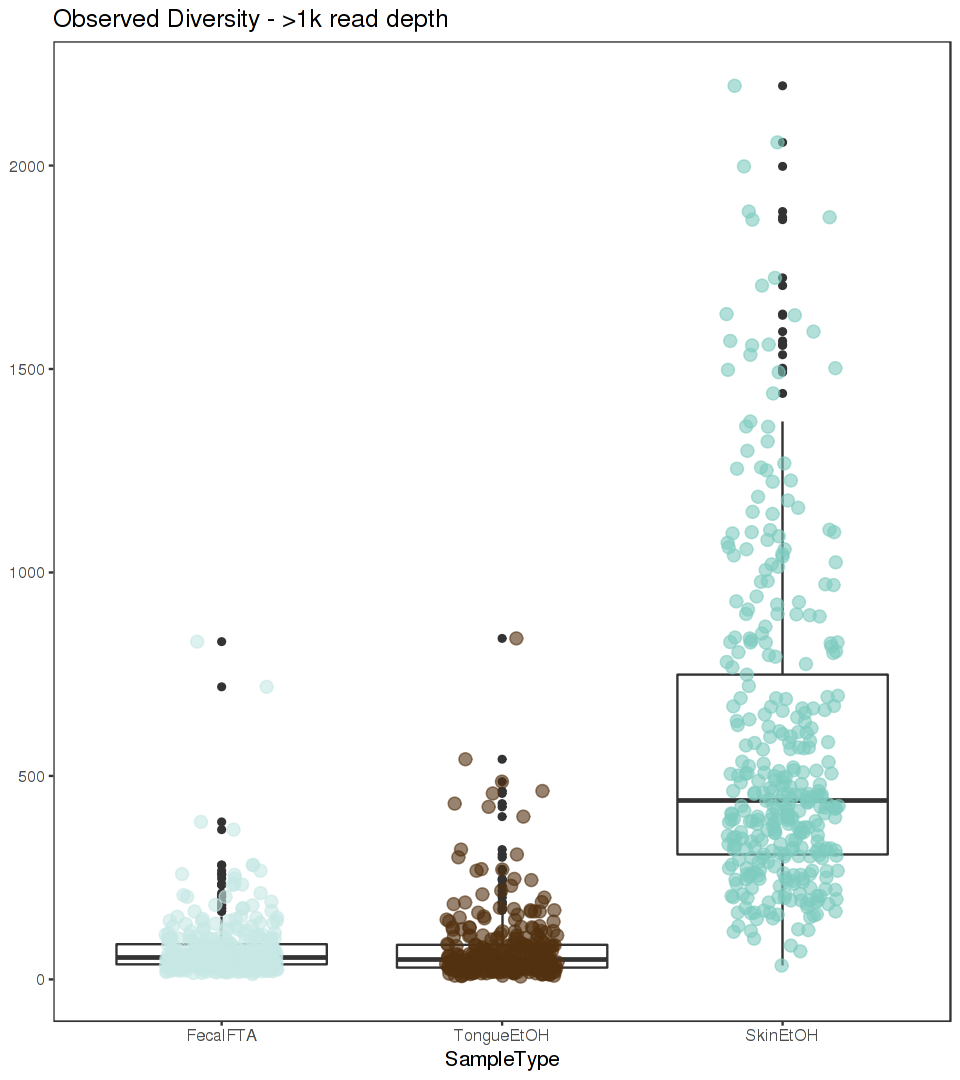

In [89]:
# BOX PLOT

p = ggplot(na.omit(dfobs), aes(x = SampleType, y = Observed)) + ggtitle("Observed Diversity - >1k read depth")

p = p + geom_boxplot() + ylab("# of Observed OTUs") #+ coord_flip()

p = p + geom_point(size = 3, alpha = 0.6, aes(color = SampleType),  
                   position = position_jitter(h = 0, w = 0.2))

p = p + scale_color_manual(values=c(
"#C7E7E4",  #fecal
"#533110",   #oral
"#7FCCC0"))   #skin



#p = p + geom_point(size = .75, position = position_jitter(h = 0, w = 0.2))


p = p + theme_bw() + theme(text=element_text(size=12, color="black",family="Arial"),
                           legend.key = element_blank(),
                           legend.position = "none",
                           axis.title.y=element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank())
p

#### Sequencing depth > 5k reads

In [15]:
sha = estimate_richness(batrun_nt_5k, split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)

dfsha = merge(sha, sample_tab, on="SampleID")

ordsha = sha %>% group_by("SampleType") %>%
    summarize(med.sha = median(Shannon)) %>%
    arrange(desc(med.sha)) %>%
    magrittr::extract2("SampleType")

stats = dfsha %>%
    group_by(SampleType) %>%
    summarize(median = median(Shannon), 
              mean = mean(Shannon),
              sd = sd(Shannon),
              sem = sd(Shannon/sqrt(length(Shannon)))) %>%
    arrange(-desc(SampleType))
stats

SampleType,median,mean,sd,sem
FecalFTA,1.360889,1.439146,0.8159084,0.04136820
SkinEtOH,4.392770,4.246628,0.9372790,0.04413474
TongueEtOH,1.372635,1.388284,0.9218356,0.05129230


In [16]:
stats.krusk = kruskal.test(Shannon~SampleType, data=dfsha)
stats.krusk


	Kruskal-Wallis rank sum test

data:  Shannon by SampleType
Kruskal-Wallis chi-squared = 731.33, df = 2, p-value < 2.2e-16


In [17]:
dunn = dunn.test(dfsha$Shannon, g=dfsha$SampleType, method="bonferroni")
dunn

  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 731.3345, df = 2, p-value = 0


                           Comparison of x by group                            
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |   FecalFTA   SkinEtOH
---------+----------------------
SkinEtOH |  -23.21565
         |    0.0000*
         |
TongueEt |   0.605368   22.66339
         |     0.8174    0.0000*

alpha = 0.05
Reject Ho if p <= alpha/2


$chi2
[1] 731.3345

$Z
[1] -23.2156523   0.6053685  22.6633966

$P
[1] 1.582109e-119  2.724671e-01 5.146411e-114

$P.adjusted
[1] 4.746328e-119  8.174013e-01 1.543923e-113

$comparisons
[1] "FecalFTA - SkinEtOH"   "FecalFTA - TongueEtOH" "SkinEtOH - TongueEtOH"

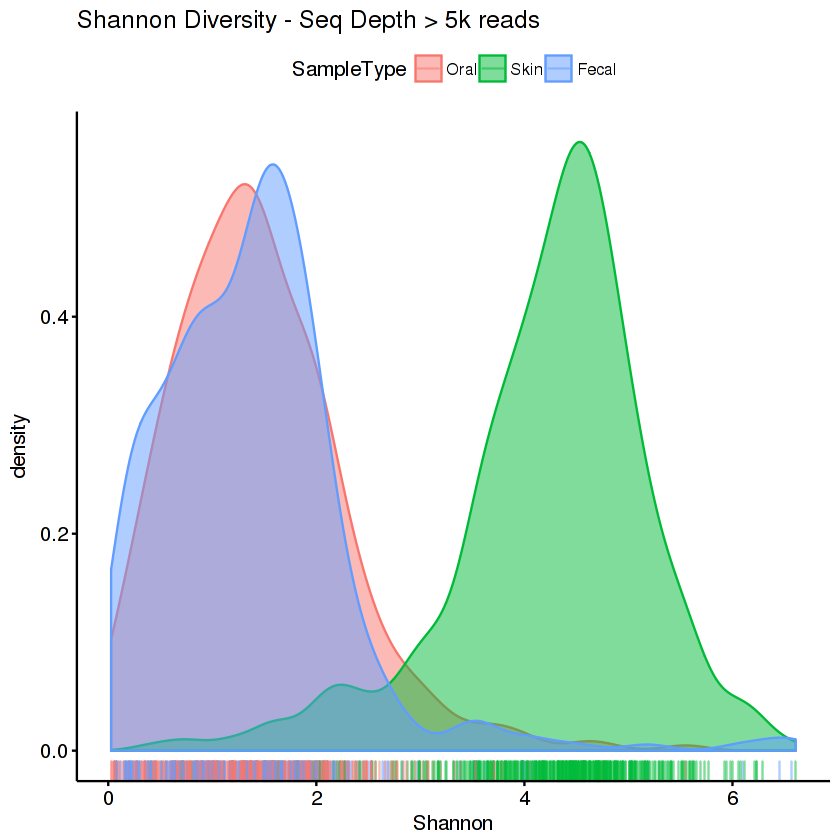

In [18]:
dfsha$SampleType <- factor(
     dfsha$SampleType, 
     labels=c('Oral','Skin','Fecal'))

dfsha_density = ggdensity(dfsha, x = "Shannon", color = "SampleType", fill= "SampleType", rug=TRUE) +
    ggtitle("Shannon Diversity - Seq Depth > 5k reads")

dfsha_density

#### Sequencing depth > 10k

In [19]:
sha = estimate_richness(batrun_nt_10k, split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)

dfsha = merge(sha, sample_tab, on="SampleID")

ordsha = sha %>% group_by("SampleType") %>%
    summarize(med.sha = median(Shannon)) %>%
    arrange(desc(med.sha)) %>%
    magrittr::extract2("SampleType")

stats = dfsha %>%
    group_by(SampleType) %>%
    summarize(median = median(Shannon), 
              mean = mean(Shannon),
              sd = sd(Shannon),
              sem = sd(Shannon/sqrt(length(Shannon)))) %>%
    arrange(-desc(SampleType))
stats

SampleType,median,mean,sd,sem
FecalFTA,1.325814,1.404406,0.7967394,0.04119841
SkinEtOH,4.428677,4.268133,0.9534531,0.04680317
TongueEtOH,1.388171,1.384869,0.9230812,0.05420519


In [20]:
stats.krusk = kruskal.test(Shannon~SampleType, data=dfsha)
stats.krusk


	Kruskal-Wallis rank sum test

data:  Shannon by SampleType
Kruskal-Wallis chi-squared = 679.11, df = 2, p-value < 2.2e-16


In [21]:
dunn = dunn.test(dfsha$Shannon, g=dfsha$SampleType, method="bonferroni")
dunn

  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 679.1069, df = 2, p-value = 0


                           Comparison of x by group                            
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |   FecalFTA   SkinEtOH
---------+----------------------
SkinEtOH |  -22.72955
         |    0.0000*
         |
TongueEt |   0.292958   21.47325
         |     1.0000    0.0000*

alpha = 0.05
Reject Ho if p <= alpha/2


$chi2
[1] 679.1069

$Z
[1] -22.7295573   0.2929586  21.4732576

$P
[1] 1.143144e-114  3.847769e-01 1.384556e-102

$P.adjusted
[1] 3.429431e-114  1.000000e+00 4.153669e-102

$comparisons
[1] "FecalFTA - SkinEtOH"   "FecalFTA - TongueEtOH" "SkinEtOH - TongueEtOH"

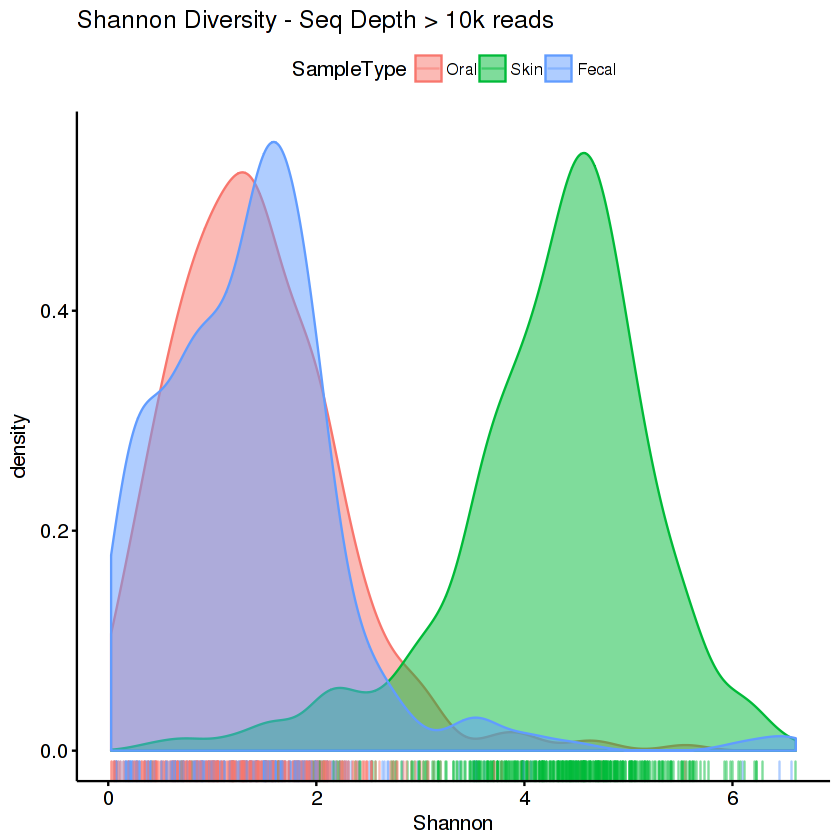

In [22]:
dfsha$SampleType <- factor(
     dfsha$SampleType, 
     labels=c('Oral','Skin','Fecal'))

dfsha_density = ggdensity(dfsha, x = "Shannon", color = "SampleType", fill= "SampleType", rug=TRUE) +
    ggtitle("Shannon Diversity - Seq Depth > 10k reads")

dfsha_density

#### Sequencing depth > 20k

In [23]:
sha = estimate_richness(batrun_nt_20k, split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)

dfsha = merge(sha, sample_tab, on="SampleID")

ordsha = sha %>% group_by("SampleType") %>%
    summarize(med.sha = median(Shannon)) %>%
    arrange(desc(med.sha)) %>%
    magrittr::extract2("SampleType")

stats = dfsha %>%
    group_by(SampleType) %>%
    summarize(median = median(Shannon), 
              mean = mean(Shannon),
              sd = sd(Shannon),
              sem = sd(Shannon/sqrt(length(Shannon)))) %>%
    arrange(-desc(SampleType))
stats

SampleType,median,mean,sd,sem
FecalFTA,1.300766,1.335272,0.7338616,0.04039775
SkinEtOH,4.330517,4.167114,1.0333603,0.06208861
TongueEtOH,1.376274,1.344112,0.8450868,0.05536348


In [24]:
stats.krusk = kruskal.test(Shannon~SampleType, data=dfsha)
stats.krusk


	Kruskal-Wallis rank sum test

data:  Shannon by SampleType
Kruskal-Wallis chi-squared = 489.44, df = 2, p-value < 2.2e-16


In [25]:
dunn = dunn.test(dfsha$Shannon, g=dfsha$SampleType, method="bonferroni")
dunn

  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 489.4363, df = 2, p-value = 0


                           Comparison of x by group                            
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |   FecalFTA   SkinEtOH
---------+----------------------
SkinEtOH |  -19.96339
         |    0.0000*
         |
TongueEt |  -0.088939   18.21495
         |     1.0000    0.0000*

alpha = 0.05
Reject Ho if p <= alpha/2


$chi2
[1] 489.4363

$Z
[1] -19.96339121  -0.08893938  18.21495358

$P
[1] 5.733045e-89 4.645650e-01 1.963752e-74

$P.adjusted
[1] 1.719913e-88 1.000000e+00 5.891256e-74

$comparisons
[1] "FecalFTA - SkinEtOH"   "FecalFTA - TongueEtOH" "SkinEtOH - TongueEtOH"

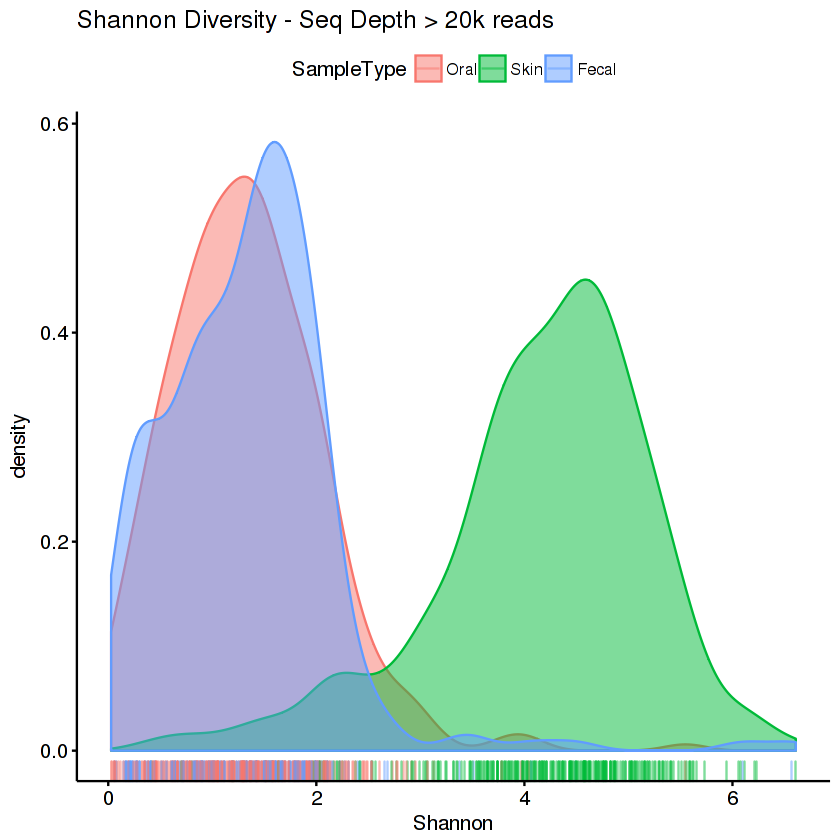

In [26]:
dfsha$SampleType <- factor(
     dfsha$SampleType, 
     labels=c('Oral','Skin','Fecal'))

dfsha_density = ggdensity(dfsha, x = "Shannon", color = "SampleType", fill= "SampleType", rug=TRUE) +
    ggtitle("Shannon Diversity - Seq Depth > 20k reads")

dfsha_density

### Observed Diversity Calculations

In [11]:
obs = estimate_richness(bats_all_nt, split = TRUE, measures = "Observed")
obs$SampleID = rownames(obs)

dfobs = merge(obs, sample_tab, on="SampleID")

ordobs = obs %>% group_by("SampleType") %>%
    summarize(med.obs = median(Observed)) %>%
    arrange(desc(med.obs)) %>%
    magrittr::extract2("SampleType")

In [12]:
stats = dfobs %>%
    group_by(SampleType) %>%
    summarize(median = median(Observed), 
              mean = mean(Observed),
              sd = sd(Observed),
              sem = sd(Observed/sqrt(length(Observed)))) %>%
    arrange(-desc(mean))
stats

SampleType,median,mean,sd,sem
FecalFTA,49,68.62687,69.23645,3.45320
TongueEtOH,49,93.34309,207.32230,10.69183
SkinEtOH,386,512.70961,372.16292,17.39003


In [13]:
stats.krusk = kruskal.test(Observed~SampleType, data=dfobs)
stats.krusk


	Kruskal-Wallis rank sum test

data:  Observed by SampleType
Kruskal-Wallis chi-squared = 711.23, df = 2, p-value < 2.2e-16


In [15]:
dunn = dunn.test(dfobs$Observed, g=dfobs$SampleType, method="bonferroni")
dunn

  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 711.2307, df = 2, p-value = 0


                           Comparison of x by group                            
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |   FecalFTA   SkinEtOH
---------+----------------------
SkinEtOH |  -22.94547
         |    0.0000*
         |
TongueEt |   0.071894   22.60842
         |     1.0000    0.0000*

alpha = 0.05
Reject Ho if p <= alpha/2


$chi2
[1] 711.2307

$Z
[1] -22.94547687   0.07189476  22.60842384

$P
[1] 8.174762e-117  4.713428e-01 1.790497e-113

$P.adjusted
[1] 2.452429e-116  1.000000e+00 5.371491e-113

$comparisons
[1] "FecalFTA - SkinEtOH"   "FecalFTA - TongueEtOH" "SkinEtOH - TongueEtOH"

In [57]:
write.csv(stats, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/stats_results/observed_SampleType.csv")

### Comparing Buccal Swabs to Tongues in EtOH

In [14]:
sample_tab = read.csv("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Metadata_files/FullMetaData_Bat_All.csv")

In [9]:
allbats = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/new_batrun_nt.rds")

In [10]:
bat_buccalswab = subset_samples(allbats, SampleType=="BuccalSwablN2")
bat_tongue = subset_samples(allbats, SampleType=="TongueEtOH")

In [27]:
#batoral_all_nt = merge_phyloseq(bat_buccalswab,bat_tongue)
saveRDS(batoral_all_nt, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/batoral_all_nt.rds")


In [1]:
batoral_all_nt = readRDS("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/batoral_all_nt.rds")


In [2]:
#Buccal Swab Shannon Div

batoral_sha = estimate_richness(batoral_all_nt, split = TRUE, measures = "Shannon")
batoral_sha$SampleID = rownames(batoral_sha)

batoral_dfsha = merge(batoral_sha, sample_tab, on="SampleID")

batoral_ordsha = batoral_dfsha %>% group_by("SampleType") %>%
    summarize(batoralmed.sha = median("Shannon")) %>%
    arrange(desc(batoralmed.sha)) %>%
    magrittr::extract2("SampleType")

ERROR: Error in estimate_richness(batoral_all_nt, split = TRUE, measures = "Shannon"): could not find function "estimate_richness"


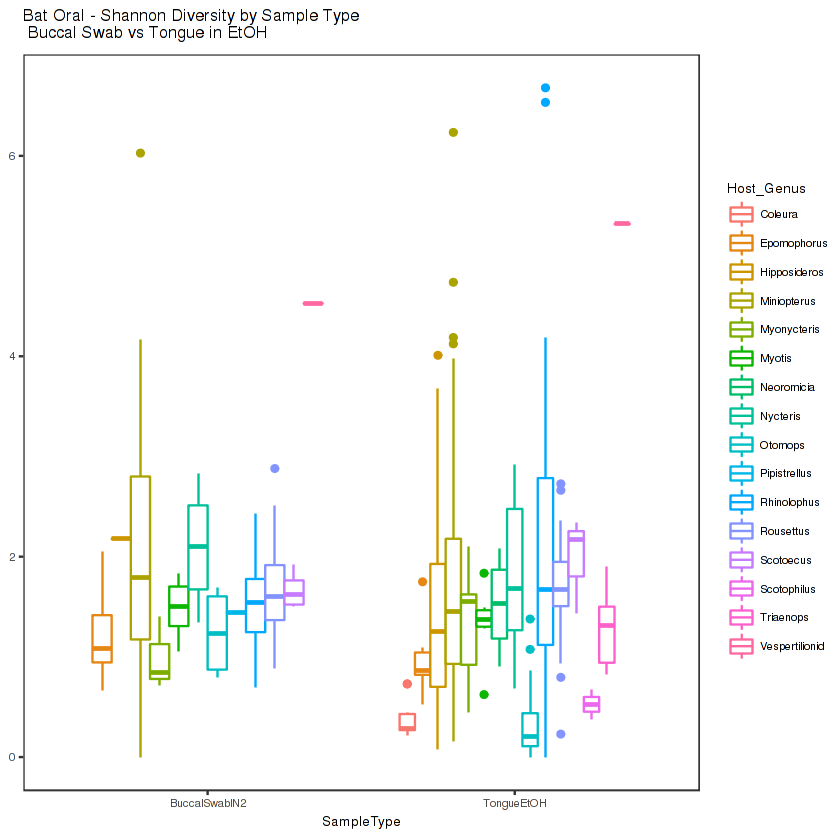

In [42]:
batoral_dfsha$SampleType <- as.factor(batoral_dfsha$SampleType)
p = ggplot(na.omit(batoral_dfsha), aes(x = SampleType, y = Shannon, color=Host_Genus)) + ggtitle("Bat Oral - Shannon Diversity by Sample Type \n Buccal Swab vs Tongue in EtOH") 

p = p + geom_boxplot() + ylab("shaerved")  

p = p + theme_bw() + theme(text=element_text(size=8, color="black",family="Times New Roman"),
                           legend.key = element_blank(),
                           #legend.position = "none",
                           axis.title.y=element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank())

p

In [40]:
#rousdfobs$SampleType <- as.factor(rousdfobs$Ecto_status)

t.test(Shannon ~ SampleType, data=batoral_dfsha) 


	Welch Two Sample t-test

data:  Shannon by SampleType
t = 1.4174, df = 377.78, p-value = 0.1572
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.04353817  0.26840739
sample estimates:
mean in group BuccalSwablN2    mean in group TongueEtOH 
                   1.668283                    1.555848 
